In [7]:
import pandas as pd
from minisom import MiniSom
from pylab import pcolor, colorbar, plot
from sklearn.preprocessing import MinMaxScaler

# Mapa Auto Organozável

In [8]:
# Importando bade de dados
X = pd.read_csv('../dados/entradas_breast.csv')
y = pd.read_csv('../dados/saidas_breast.csv')

# Definindo variáveis X
X = X.iloc[:,0:30].values
y = y.iloc[:,0].values

In [9]:
# Normalizando valores de X
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [10]:
# Montando mapa
som = MiniSom(x = 11, y = 11, input_len = 30, sigma = 1.0, learning_rate = 0.5, random_seed = 2)
# Inicializando os pesos
som.random_weights_init(X)
# Treinamento
som.train_random(data = X, num_iteration = 100)

In [11]:
# Pesos
som._weights

array([[[6.92455503e-04, 2.94288351e-01, 3.50791666e-01, ...,
         3.46072637e-04, 9.67757425e-02, 7.10674151e-05],
        [5.34930026e-04, 1.78607792e-01, 2.78710166e-01, ...,
         3.60630590e-04, 5.24335857e-01, 1.15731150e-04],
        [4.79753909e-04, 3.09318044e-01, 2.58243356e-01, ...,
         3.77475042e-04, 7.19866363e-02, 2.14040494e-04],
        ...,
        [7.68077789e-04, 3.46250992e-01, 3.85666842e-01, ...,
         3.91041361e-01, 1.16709435e-01, 7.31606186e-03],
        [6.31325032e-04, 2.40084681e-01, 3.25771415e-01, ...,
         1.54547972e-01, 9.75711967e-02, 1.16403257e-03],
        [6.21865282e-04, 3.77613322e-01, 3.24920235e-01, ...,
         1.67970349e-02, 1.42797101e-02, 1.86733688e-04]],

       [[1.09140678e-03, 5.01525353e-01, 5.41693530e-01, ...,
         1.07857416e-03, 4.42004965e-02, 2.29155466e-04],
        [6.47100246e-04, 4.51025960e-01, 3.35167122e-01, ...,
         1.74164404e-03, 3.77037059e-01, 1.59180415e-04],
        [7.01155120e-04, 

In [12]:
# Valores do mapa
som._activation_map

array([[0.59833741, 0.41906991, 0.62487185, 0.94551451, 0.87442689,
        0.66554865, 1.05066937, 0.58009679, 0.63891501, 0.58115198,
        0.96378281],
       [0.96712362, 0.357691  , 0.58898844, 0.71709503, 1.07413157,
        0.6740655 , 0.81943263, 0.69544064, 0.89732797, 0.69851919,
        1.0072531 ],
       [0.71078563, 0.67461231, 0.82915004, 0.67989444, 0.67223905,
        0.68656393, 0.6294137 , 0.54922207, 0.82464297, 0.82183104,
        0.64409791],
       [0.75826202, 0.67536045, 0.72102632, 1.04581814, 0.66643829,
        0.8302114 , 0.92573442, 0.66749802, 0.91008806, 0.99779015,
        0.73728453],
       [0.83543597, 0.79385807, 1.13696469, 1.010459  , 0.53260125,
        0.6814029 , 0.87776973, 0.6723832 , 0.66296843, 1.14454198,
        0.72105433],
       [0.84934115, 0.66184398, 0.69111828, 0.62607916, 0.67094666,
        0.66917799, 1.2075405 , 0.73431394, 0.78062282, 0.97759948,
        0.7357952 ],
       [0.96973655, 0.67795707, 0.48996155, 0.53210187, 1.

In [13]:
# Matriz com os BMU
q = som.activation_response(X)

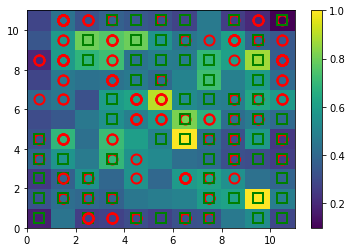

In [14]:
# MID - mean inter neuron distance
pcolor(som.distance_map().T)
colorbar()

#w = som.winner(X[2])
markers = ['o', 's']
color = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
        markerfacecolor = 'None', markersize = 10,
        markeredgecolor = color[y[i]], markeredgewidth = 2)